# Build Models

In this notebook, I will read in the preprocessed data and try out a few different models.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import plot_tree
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns

In [2]:
# Import train data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

# Import test data
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

## Linear Regression

I will scale the data for linear regression and ridge regression, but not for the tree-based models.

In [3]:
# Define scaler
scaler = MinMaxScaler()

# Scale train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled train and test data to dataframes
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [4]:
# Define function to compute mean absolute error and R-squared score for Linear Regression
def LR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test):
    LR_model = LinearRegression()
    LR_model.fit(df_X_train_scaled, y_train)
    LR_predictions = LR_model.predict(df_X_test_scaled)
    return (mean_absolute_error(y_test, LR_predictions), LR_model.score(df_X_test_scaled, y_test))

# Print mean absolute error
print("Linear Regression mean absolute error:") 
print(LR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[0])

# Print R-squared value
print("Linear Regression R-squared test score:") 
print(LR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[1])



Linear Regression mean absolute error:
1.1609395354099004
Linear Regression R-squared test score:
0.9896609731566014


Linear regression with L2 regularization (Ridge regression) limits the size of the coefficients.

In [5]:
# Define function to compute mean absolute error and R-squared score for Ridge Regression
def RR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test):
    RR_model = Ridge(alpha=1.0)
    RR_model.fit(df_X_train_scaled, y_train)
    RR_predictions = RR_model.predict(df_X_test_scaled)
    return (mean_absolute_error(y_test, RR_predictions), RR_model.score(df_X_test_scaled, y_test))

# Print mean absolute error
print("Ridge Regression mean absolute error:") 
print(RR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[0])

# Print R-squared value
print("Ridge Regression R-squared test score:") 
print(RR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[1])



Ridge Regression mean absolute error:
1.9744097398825498
Ridge Regression R-squared test score:
0.9559732348601897


## Decision Tree Regressor

In [6]:
# Define function to compute mean absolute error and R-squared score for Decision Tree Regressor
def DTR_score(X_train, X_test, y_train, y_test):
    DTR_model = DecisionTreeRegressor(random_state=0)
    DTR_model.fit(X_train, y_train)
    DTR_predictions = DTR_model.predict(X_test)
    return (mean_absolute_error(y_test, DTR_predictions), DTR_model.score(X_test, y_test))

# Print mean absolute error
print("Decision Tree Regressor mean absolute error:") 
print(DTR_score(X_train, X_test, y_train, y_test)[0])

# Print R-squared value
print("Decision Tree Regressor R-squared test score:") 
print(DTR_score(X_train, X_test, y_train, y_test)[1])

Decision Tree Regressor mean absolute error:
3.9343698421052635
Decision Tree Regressor R-squared test score:
0.8567514316012395


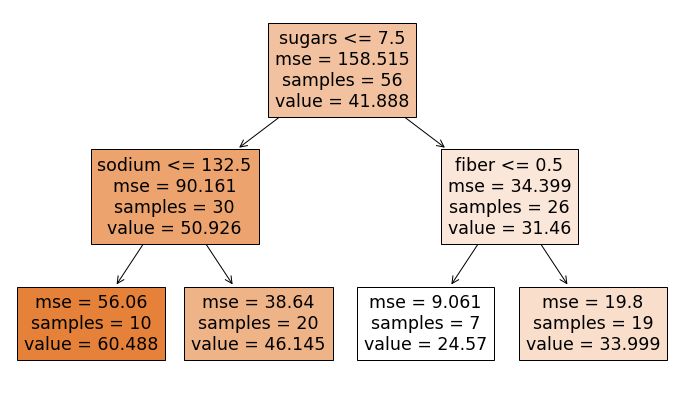

In [7]:
# Visualize a small part of the Decision Tree Regressor
DTR_model_fig = DecisionTreeRegressor(max_depth=2,random_state=0)
DTR_model_fig.fit(X_train, y_train)

cereal_feature_names=('calories','protein','fat','sodium','fiber','sugars','potassium','vitamins',
                      'weight','cups','cold')

fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(DTR_model_fig, feature_names=cereal_feature_names,filled=True)

## Random Forest Regressor

A Random Forest Regressor can improve on the performance of the Decision Tree Regressor, as it uses an ensemble of decision trees.

In [8]:
# Use GridSearchCV to find best values for n_estimators and max_features for Random Forest Regressor
parameter = {
    'n_estimators' : [10, 50, 100, 150],
    'max_features' : [3, 5, 10]
}

RFR = RandomForestRegressor()
RFR_CV = GridSearchCV(RFR, parameter).fit(X_train, np.ravel(y_train))
RFR_CV.best_params_

{'max_features': 5, 'n_estimators': 150}

In [9]:
# Define function to compute mean absolute error and R-squared score for Random Forest Regressor
def RFR_score(X_train, X_test, y_train, y_test):
    RFR_model = RandomForestRegressor(n_estimators=150, max_features=5)
    RFR_model.fit(X_train, np.ravel(y_train))
    RFR_predictions = RFR_model.predict(X_test)
    return (mean_absolute_error(y_test, RFR_predictions), RFR_model.score(X_test, y_test))

# Print mean absolute error
print("Random Forest Regressor mean absolute error:") 
print(RFR_score(X_train, X_test, y_train, y_test)[0])

# Print R-squared value
print("Random Forest Regressor R-squared test score:") 
print(RFR_score(X_train, X_test, y_train, y_test)[1])


Random Forest Regressor mean absolute error:
3.8448607108771853
Random Forest Regressor R-squared test score:
0.8856752476378903


## XGBoost Regressor

I will also try the XGBoost Regressor, which builds a series of trees, with each improving on the last.

In [10]:
# Use GridSearchCV to find best values for n_estimators, learning_rate, and max_depth for XGBoost Regressor
parameters = {
    'n_estimators' : [100, 200, 300, 400],
    'learning_rate' : [0.07, 0.09, 0.11, 0.13],
    'max_depth' : [3, 5, 7]
}

XGB = XGBRegressor()
XGB_CV = GridSearchCV(XGB, parameters).fit(X_train, y_train)
XGB_CV.best_params_

{'learning_rate': 0.11, 'max_depth': 7, 'n_estimators': 100}

In [11]:
# Define function to compute mean absolute error and R-squared score for XGBoost Regressor
def XGB_score(X_train, X_test, y_train, y_test):
    XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.11, max_depth=7)
    XGB_model.fit(X_train, y_train)
    XGB_predictions = XGB_model.predict(X_test)
    return (mean_absolute_error(y_test, XGB_predictions), XGB_model.score(X_test, y_test), XGB_model.feature_importances_)

# Print mean absolute error
print("XGBoost Regressor mean absolute error:") 
print(XGB_score(X_train, X_test, y_train, y_test)[0])

# Print R-squared value
print("XGBoost Regressor R-squared test score:") 
print(XGB_score(X_train, X_test, y_train, y_test)[1])


XGBoost Regressor mean absolute error:
3.5483723983668285
XGBoost Regressor R-squared test score:
0.9083806545292218


## Model Comparison

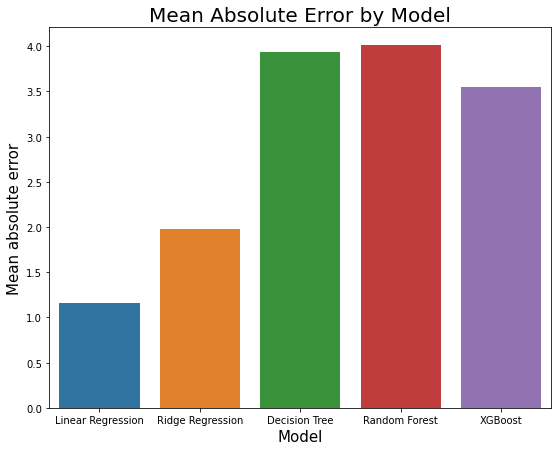

In [12]:
# Plot of mean absolute error values
mae_d = {'model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost'], 
         'mae': [LR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[0],
                 RR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[0],
                 DTR_score(X_train, X_test, y_train, y_test)[0], 
                 RFR_score(X_train, X_test, y_train, y_test)[0], XGB_score(X_train, X_test, y_train, y_test)[0]]}
mae_df = pd.DataFrame(data=mae_d)

plt.figure(figsize=(9,7))
sns.barplot(x=mae_df['model'], y=mae_df['mae'])
plt.title("Mean Absolute Error by Model",fontsize=20)
plt.xlabel("Model",fontsize=15)
plt.ylabel("Mean absolute error",fontsize=15);

The best (lowest) mean absolute error is for Linear Regression, followed by Ridge Regression and then XGBoost.

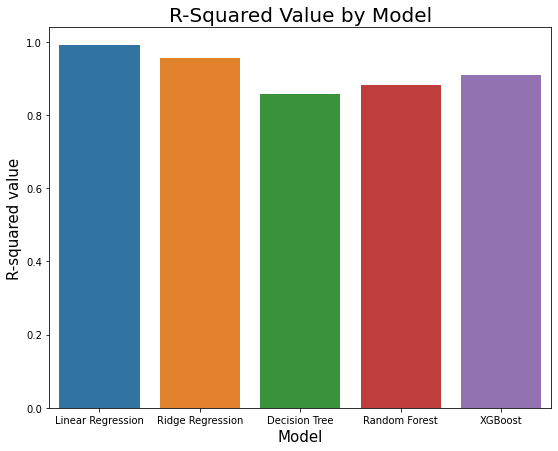

In [13]:
# Plot of R-squared values
r2_d = {'model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost'], 
        'r2': [LR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[1],
               RR_score(df_X_train_scaled, df_X_test_scaled, y_train, y_test)[1],
               DTR_score(X_train, X_test, y_train, y_test)[1], 
               RFR_score(X_train, X_test, y_train, y_test)[1], XGB_score(X_train, X_test, y_train, y_test)[1]]}
r2_df = pd.DataFrame(data=r2_d)

plt.figure(figsize=(9,7))
sns.barplot(x=r2_df['model'], y=r2_df['r2'])
plt.title("R-Squared Value by Model",fontsize=20)
plt.xlabel("Model",fontsize=15)
plt.ylabel("R-squared value",fontsize=15);

The best (highest) R-squared value is for Linear Regression, follwed by Ridge Regression and then XGBoost.

## Feature Insights

I can check how much importance each feature had in the XGBoost model.

In [14]:
# Redefine XGB model
XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.11, max_depth=7)
XGB_model.fit(X_train, y_train)

# Obtain dictionary of feature importance scores
feature_important = XGB_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

# Create dataframe for plot
feature_importance_XG = pd.DataFrame(list(zip(keys, values)))
feature_importance_XG_plot = feature_importance_XG.sort_values(by = 1, ascending=False)

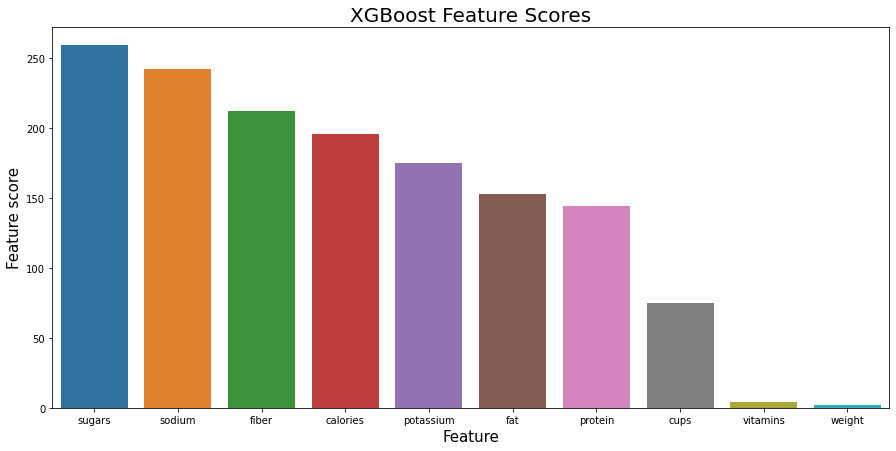

In [15]:
# Plot of feature scores for XGB model
plt.figure(figsize=(15,7))
sns.barplot(x=feature_importance_XG_plot[0], y=feature_importance_XG_plot[1])
plt.title("XGBoost Feature Scores",fontsize=20)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Feature score",fontsize=15);

The coefficients for Linear Regression and Ridge Regression give us a rough idea of the importance of the features in these models.

In [17]:
# Redefine linear regression model
LR_model = LinearRegression()
LR_model.fit(df_X_train_scaled, y_train)

# Prepare dataframe for linear regression coefficients plot
coefficients_LR = pd.concat([pd.DataFrame(df_X_train_scaled.columns),pd.DataFrame(np.transpose(LR_model.coef_))], axis = 1)
coefficients_LR.columns=['Feature','Coefficient']
coefficients_LR_plot = coefficients_LR.sort_values(by = "Coefficient", ascending=False)

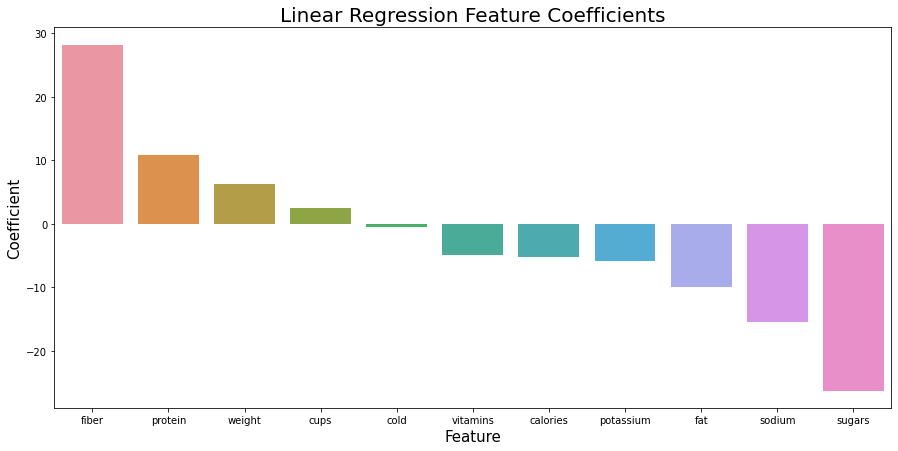

In [18]:
# Plot of coefficients for linear regression
plt.figure(figsize=(15,7))
sns.barplot(x=coefficients_LR_plot['Feature'], y=coefficients_LR_plot['Coefficient'])
plt.title("Linear Regression Feature Coefficients",fontsize=20)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Coefficient",fontsize=15);

In [19]:
# Redefine ridge regression model
RR_model = Ridge(alpha=1.0)
RR_model.fit(df_X_train_scaled, y_train)

# Prepare dataframe for ridge regression coefficients plot
coefficients_RR = pd.concat([pd.DataFrame(df_X_train_scaled.columns),pd.DataFrame(np.transpose(RR_model.coef_))], axis = 1)
coefficients_RR.columns=['Feature','Coefficient']
coefficients_RR_plot = coefficients_RR.sort_values(by = "Coefficient", ascending=False)

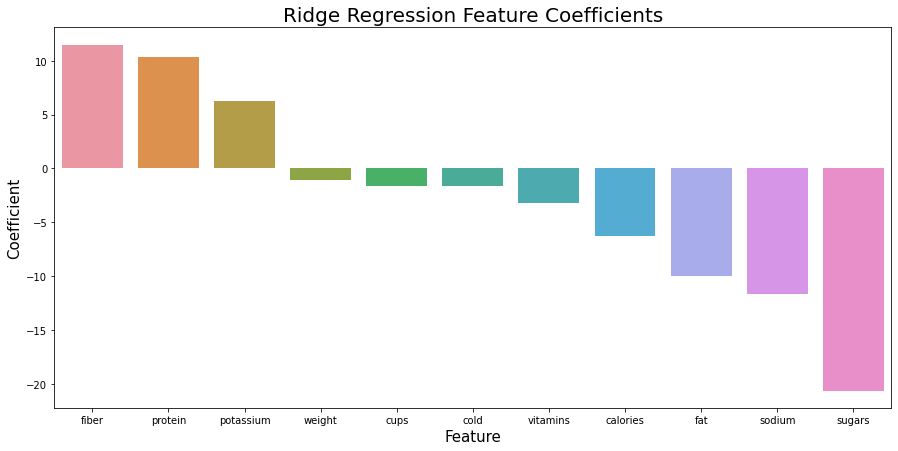

In [20]:
# Plot of coefficients for ridge regression
plt.figure(figsize=(15,7))
sns.barplot(x=coefficients_RR_plot['Feature'], y=coefficients_RR_plot['Coefficient'])
plt.title("Ridge Regression Feature Coefficients",fontsize=20)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Coefficient",fontsize=15);

## Conclusions

The models which performed best were Linear Regression, Ridge Regression, and XGBoost.

The most important features according to these models are:

XGBoost
1. sugars
2. sodium
3. fiber
4. calories
5. potassium

Linear Regression
1. fiber (positive)
2. sugars (negative)
3. sodium (negative)
4. protein (positive)
5. fat (negative)

Ridge Regression
1. sugars (negative)
2. sodium (negative)
3. fiber (positive)
4. protein (positive)
5. fat (negative)

All models agree that sugars, sodium, and fiber are the three most important features.

## Action Items

A cereal low in sugars and sodium and high in fiber will be the basic goal for the new product. We also know that protein should be high and fat should be low.

Since vitamins don't have a strong effect on the overall rating, it may be possible to forgo adding them, but of course a selling point for many cereals is fortification with vitamins, and this may be important for the health of our consumers, so further research is needed on this point.

We could also reassess existing products, to see if there may be ways to tweak the ingredients in order to improve the health scores without otherwise changing the product too much.

Since we want the new cereal to sell well, it may be a good idea to find other datasets which rank existing products, such as consumer taste tests, and perform a similar analysis, in order increase the likelihood that the new products will be successful.